# Basic Dataset


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reduced_isrc.csv', index_col=0)
df.shape

(139629, 27)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139629 entries, 0 to 139628
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   isrc                    139629 non-null  object 
 1   genres                  139629 non-null  object 
 2   name                    139629 non-null  object 
 3   artists                 139629 non-null  object 
 4   album                   139629 non-null  object 
 5   release_date            139629 non-null  object 
 6   release_date_precision  139629 non-null  object 
 7   uri                     139629 non-null  object 
 8   spotify_id              139629 non-null  object 
 9   chart_power             635 non-null     float64
 10  popularity              139629 non-null  int64  
 11  danceability            139629 non-null  float64
 12  energy                  139629 non-null  float64
 13  key                     139629 non-null  int64  
 14  loudness                1

In [4]:
df.drop(['chart_power'], axis=1, inplace=True)

# popularity cut

In [5]:
#popularity > 4
df = df[df['popularity'] > 4]
df.shape

(74664, 26)

# last.fm features

- playcount over 1000
- listeners over 100


- >54075 songs
- >29 features
  - playcount
  - listeners
  - tags

#

# lyrics

> 32 features

- clear_name (name without things like remastered, remix or brackets)
- lyrics_url (url from genius.com or musixmatch.com)
- lyrics 

In [6]:
df2 = pd.read_csv('data_cut.csv', index_col=0)
df2.shape

(54075, 32)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54075 entries, USSM18600196 to QMFMG1552282
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genres                  54075 non-null  object 
 1   name                    54075 non-null  object 
 2   artists                 54075 non-null  object 
 3   album                   54075 non-null  object 
 4   release_date            54075 non-null  object 
 5   release_date_precision  54075 non-null  object 
 6   uri                     54075 non-null  object 
 7   spotify_id              54075 non-null  object 
 8   chart_power             622 non-null    float64
 9   popularity              54075 non-null  int64  
 10  danceability            54075 non-null  float64
 11  energy                  54075 non-null  float64
 12  key                     54075 non-null  int64  
 13  loudness                54075 non-null  float64
 14  mode                    5

In [8]:
df3 = pd.read_csv('final_dataset.csv', index_col=0)
df3.shape

(45567, 36)

In [9]:
df4 = pd.read_csv('final_dataset_no_duplicates.csv', index_col=0)
df4.shape

(41364, 37)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data for each step
s_steps = ["start", "spotify popularity", "last.fm playcount & listeners", "no lyrics", "short lyrics", "english lyrics"]
f_steps = ["start", "last.fm", "lyrics", "charts", "rank", "language"]
num_songs = [139629, 74664, 54075, 45449, 44514, 40655]
num_features = [26, 29, 32, 34, 36, 37]
usable_features = [16, 17, 17, 17, 18, 19]

# Create a DataFrame from the data
f_data = pd.DataFrame({'Steps': f_steps, 'Number of Features': num_features, 'Usable Features': usable_features})
s_data = pd.DataFrame({'Steps': s_steps, 'Number of Songs': num_songs})


C:\Users\Maddin\AppData\Local\Temp\ipykernel_7164\3718824833.py:29: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x000001F05C857890> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=[ax.patches[0], plt.Line2D([0], [0], color='red', label='Usable Features')], loc='upper right')


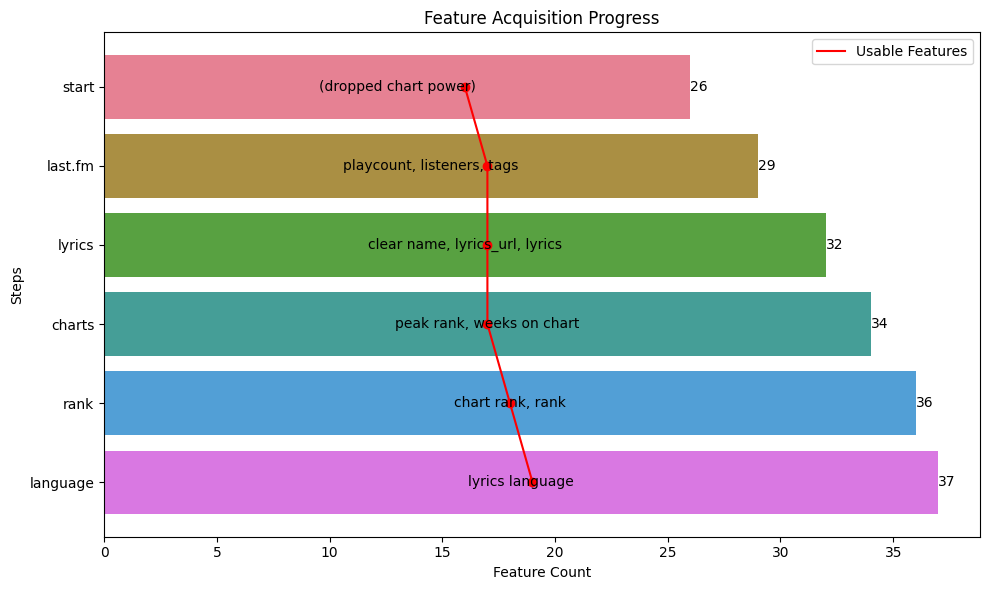

In [15]:
# Define a custom color palette for the steps
colors = sns.color_palette("husl", len(f_steps))

# Create a bar plot with the steps on the y-axis and feature count on the x-axis
plt.figure(figsize=(10, 6))
ax =sns.barplot(x='Number of Features', y='Steps', data=f_data, palette=colors)
# sns.barplot(x='Usable Features', y='Steps', data=f_data, color='red', alpha= 0.8, label='Usable Features')

# Add labels and title
plt.xlabel("Feature Count")
plt.ylabel("Steps")
plt.title("Feature Acquisition Progress")

# Add annotations for the features
added_features = ['(dropped chart power)', 'playcount, listeners, tags', 'clear name, lyrics_url, lyrics', 'peak rank, weeks on chart', 'chart rank, rank', 'lyrics language']
i = 0
for p in ax.patches:
    if i > 5:
        break
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')
    plt.text(width / 2 , p.get_y() + p.get_height() / 2, added_features[i], ha='center', va='center')
    i += 1

# Draw a red line for usable features
plt.plot(usable_features, range(len(f_steps)), color='red', label='Usable Features', marker='o')

# Create a legend with a custom label for the red line
plt.legend(handles=[ax.patches[0], plt.Line2D([0], [0], color='red', label='Usable Features')], loc='upper right')


# Show the plot
plt.tight_layout()
plt.show()

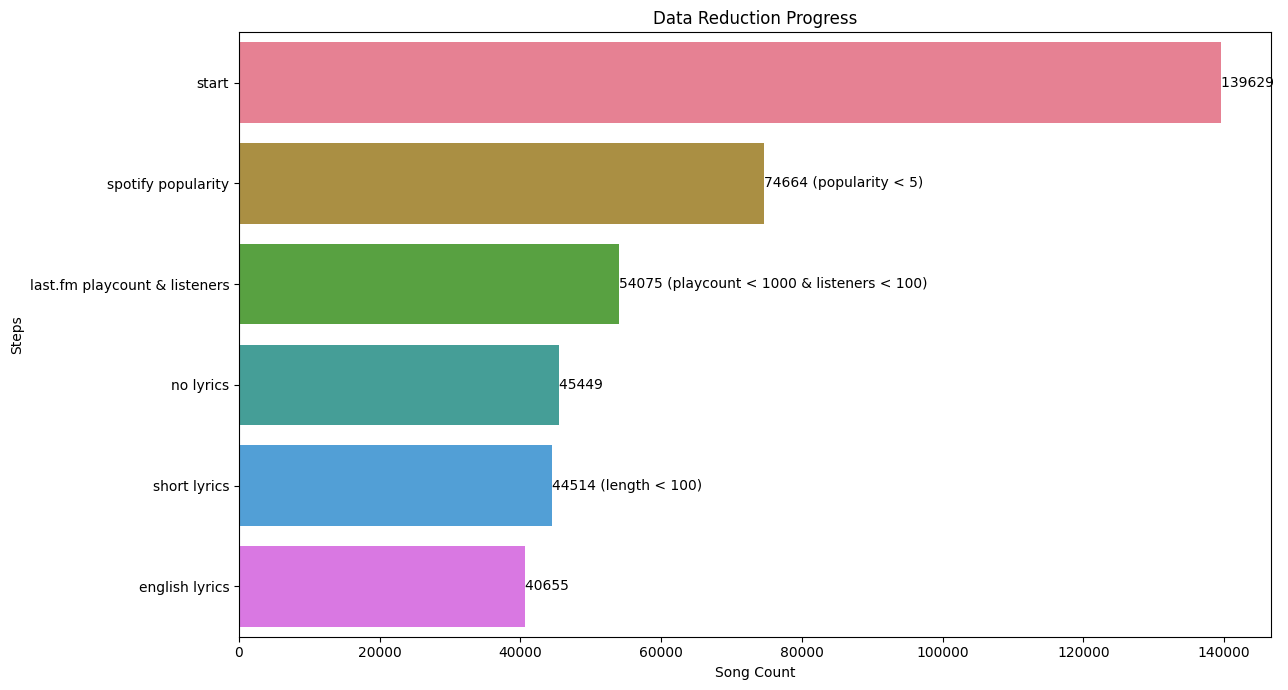

In [23]:
# Define a custom color palette for the steps
colors = sns.color_palette("husl", len(s_steps))

# Create a bar plot with the steps on the y-axis and feature count on the x-axis
plt.figure(figsize=(13, 7))
ax =sns.barplot(x='Number of Songs', y='Steps', data=s_data, palette=colors)

# Add labels and title
plt.xlabel("Song Count")
plt.ylabel("Steps")
plt.title("Data Reduction Progress")

# Add annotations for the features
cut_info = ['', '(popularity < 5)', '(playcount < 1000 & listeners < 100)', '', '(length < 100)','']
i = 0
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)} {cut_info[i]}', ha='left', va='center')
    i += 1


# Show the plot
plt.tight_layout()
plt.show()